<a href="https://colab.research.google.com/github/AlhanoufIB/IT326Project/blob/main/Reports/Phase2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

warnings.filterwarnings("ignore")
df = pd.read_csv("/content/german_credit_data.csv")

# 1st- Data Summarization

### No of rows and columns as well as the data types of each column (metadata)

In [66]:
print(f"The dataset contains {df.shape[0]} rows and {df.shape[1]} columns.")
df.info()

The dataset contains 1000 rows and 11 columns.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        1000 non-null   int64 
 1   Age               1000 non-null   int64 
 2   Sex               1000 non-null   object
 3   Job               1000 non-null   int64 
 4   Housing           1000 non-null   object
 5   Saving accounts   817 non-null    object
 6   Checking account  606 non-null    object
 7   Credit amount     1000 non-null   int64 
 8   Duration          1000 non-null   int64 
 9   Purpose           1000 non-null   object
 10  Risk              1000 non-null   object
dtypes: int64(5), object(6)
memory usage: 86.1+ KB


### statistical summary of our data

In [67]:
df.describe(include='all')

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
count,1000.000000,1000.000000,1000,1000.000000,1000,817,606,1000.000000,1000.000000,1000,1000
unique,NaN,NaN,2,NaN,3,4,3,NaN,NaN,8,2
top,NaN,NaN,male,NaN,own,little,little,NaN,NaN,car,good
freq,NaN,NaN,690,NaN,713,603,274,NaN,NaN,337,700
mean,499.500000,35.546000,NaN,1.904000,NaN,NaN,NaN,3271.258000,20.903000,NaN,NaN
std,288.819436,11.375469,NaN,0.653614,NaN,NaN,NaN,2822.736876,12.058814,NaN,NaN
min,0.000000,19.000000,NaN,0.000000,NaN,NaN,NaN,250.000000,4.000000,NaN,NaN
25%,249.750000,27.000000,NaN,2.000000,NaN,NaN,NaN,1365.500000,12.000000,NaN,NaN
50%,499.500000,33.000000,NaN,2.000000,NaN,NaN,NaN,2319.500000,18.000000,NaN,NaN
75%,749.250000,42.000000,NaN,2.000000,NaN,NaN,NaN,3972.250000,24.000000,NaN,NaN


In [68]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
df.head()
df = df.drop(columns=['Unnamed: 0'])




###**Five-Number Summary**

---

In [69]:
df.describe()

,Age,Job,Credit amount,Duration
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,35.546000,1.904000,3271.258000,20.903000
std,11.375469,0.653614,2822.736876,12.058814
min,19.000000,0.000000,250.000000,4.000000
25%,27.000000,2.000000,1365.500000,12.000000
50%,33.000000,2.000000,2319.500000,18.000000
75%,42.000000,2.000000,3972.250000,24.000000
max,75.000000,3.000000,18424.000000,72.000000



**Statistical Summary of the numeric attributes:**

- **Age**: Ranges from 19-75, with most applicants concentrated between 27 and 42.The median is close to 33 while the average is around 35, and the standard deviation of about 11.4 shows theres a moderate spread in applicants' ages, meaning most are within middle age.

- **Job**: Ranges from 0-3 **but although** it's stored as numeric, this column is **encoded categorical data** representing different job types.It is shown below using a **bar chart** for clearer visualization of the categories.

- **Credit Amount**: Credit values range between 250 and 18,424. Most loans are between 1,362 and 3,988, with a median of 2,300, an average of 3,271 and a standard deviation of about 2,823, showing that loan amounts vary among applicants, some small and others large.

- **Duration**: Loan terms go from 4-72 months.The median is 18 months with an average of 20 months, showing that loan durations vary widely among applicants, most however lasting between 12-24 months.

**(Note: "Job" will not be considered in outlier analysis since its a categorical attribute stored as numeric, not truly numerical.)**

###**Outlier Detection (Using Z-score Method)**

---

Outlier detection was performed using the Z-score method on the numeric attributes to identify records that differ significantly from most of the data.Recognizing these values helps ensure they don't sway the results nor reduce the accuracy of the model.The table below show the rows that contain outliers:

In [70]:
from scipy.stats import zscore

numeric_colums = ['Age', 'Credit amount', 'Duration']

outliers = df[(df[numeric_colums].apply(zscore).abs() > 3).any(axis=1)]

outliers[numeric_colums + ['Risk']]

,Age,Credit amount,Duration,Risk
18,44,12579,24,bad
29,63,6836,60,bad
63,25,14421,48,bad
87,47,12612,36,bad
95,58,15945,54,bad
105,39,11938,24,bad
134,21,10144,60,good
163,70,7308,10,good
186,74,5129,9,bad
236,23,14555,6,bad


###**Boxplots for Outliers**
---

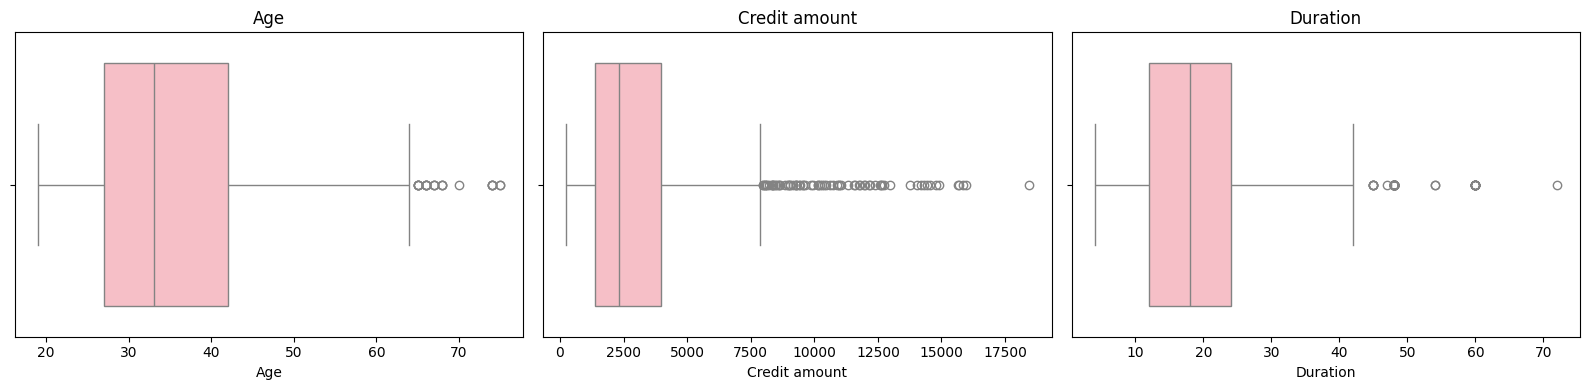

In [71]:
numeric_colums = ['Age', 'Credit amount', 'Duration']
colors = ['#FFB6C1','#FFB6C1','#FFB6C1']

plt.figure(figsize=(16,4))
for i, col in enumerate(numeric_colums, 1):
  plt.subplot(1, 3, i)
  sns.boxplot(x=df[col], color=colors[i-1])
  plt.title(f'{col}')

plt.tight_layout()
plt.show()


###**Outlier Analysis:**
---

**Boxplots** were used to highlight the outliers and are useful as they also visualize the five-number summary for each attribute.Below are the boxplot results for each numeric attribute:

- **Age**: The distribution is faily balanced, with most values between 27 and 42.A few outliers appear above 65, showing older applicants compared to the majority.

- **Credit Amount**: Most loans range between
1,300-4,000 but many outliers exist above 10,000 showing that a few applicants took unusually large loans.

- **Duration**: Usual loan durations fall between 12 and 24 months.Outliers above 48 months show that some repayment periods took unusually long.


###**Histogram Visualization For Numeric Attributes**
---

We used **histograms** to better understand and visualize how each numeric attribute was distributed.They show us how the values are spread and how often they occur, which helps us detect trends and skewness.This also indicates if normalization or scaling might be needed during preprocesing.

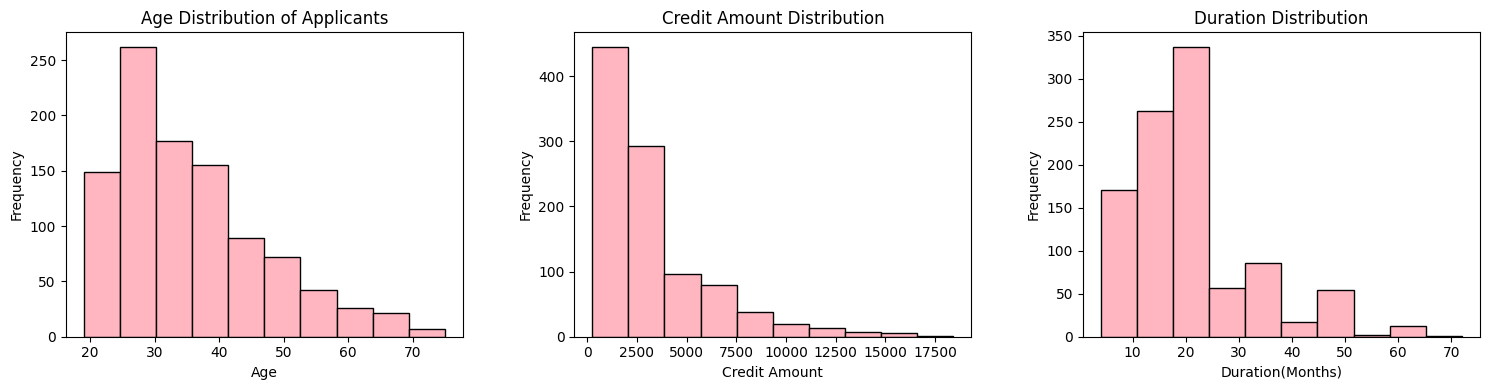

In [72]:

plt.figure(figsize=(15,4))

plt.subplot(1,3,1)
plt.hist(df['Age'], bins=10, color='#FFB6C1', edgecolor="black")
plt.title("Age Distribution of Applicants")
plt.xlabel("Age")
plt.ylabel("Frequency")


plt.subplot(1,3,2)
plt.hist(df['Credit amount'], bins=10, color='#FFB6C1', edgecolor="black")
plt.title("Credit Amount Distribution")
plt.xlabel("Credit Amount")
plt.ylabel("Frequency")


plt.subplot(1,3,3)
plt.hist(df['Duration'], bins=10, color='#FFB6C1', edgecolor="black")
plt.title("Duration Distribution")
plt.xlabel("Duration(Months)")
plt.ylabel("Frequency")


plt.tight_layout(w_pad=4)
plt.show()






####**Histogram Descriptions:**

**Age**
*   This histogram shows how applicants are distributed across different ages.
*   Most Applicants are between 20-40 years old, with the peak being late 20s and fewer applicants above 60.
*   Overall distribution is right-skewed meaning much more younger applicants than older.

**Credit Amount**
*   This histogram displays the distribution of credit amounts.
*   Most applicants requested amounts below 5000, with a few very high values up to 17000.
* The presence of high values indicates right-skewed distribution, meaning only few applicants requested much larger loans than average.

**Duration**
*   This histogram shows the duration of credit in months.
*   Most durations are around 12-24 months, with fewer applicants having loans lasting more than 48 months
*  The right-skewed pattern indicated that short-term loans are much more common than longer ones.

**Overall Observation**:

All three numeric attributes are right-skewed and have very different value ranges showing clear variety in values.To make sure np attributes outweighs the others, **normalization** during preprocessing is needed.









###**ScatterPlot: Credit Amount vs Duration (By Risk)**
---


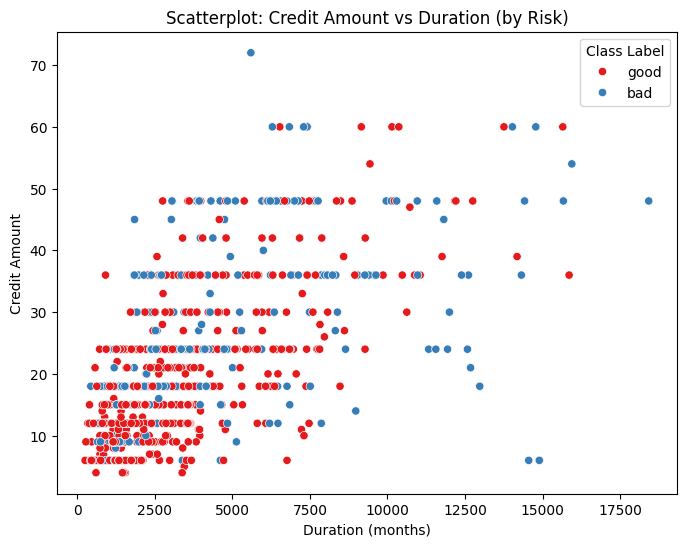

In [73]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='Credit amount' , y='Duration', hue='Risk', palette='Set1')
plt.title('Scatterplot: Credit Amount vs Duration (by Risk)')
plt.xlabel('Duration (months)')
plt.ylabel('Credit Amount')
plt.legend(title='Class Label')
plt.show()

####**Scatterplot Description:**
Scatterplots are helpful because they show how two numeric attributes interact and reveal patterns that might not appear in other visualizations.
We used a scatterplot to examine the relationship between **credit amount** and **loan duration**, with each point colored by the class label (*Risk*).

*   Most applicants are grouped in the lower ranges for both credit amount and duration showing that smaller loans *with* shorter repayment periods are the most common.

*  Theres a noticeable trend where smaller loans and shorter durations often aligh with **good-risk** cases, while higher credit amounts and longer durations appear more in **bad-risk** cases.


* This visualization highlights how both attributes interact, showing a clear pattern that reflects their importance and helps us understand how they influence the overall risk behavior in the dataset.









**Summarize categorical attributes**

---



In [74]:
categorical_cols = ['Sex', 'Housing', 'Saving accounts', 'Checking account', 'Purpose']

for col in categorical_cols:
    print(f"\n{col}:")
    counts = df[col].value_counts()
    for value, count in counts.items():
        print(f"  {value}: {count}")
    if df[col].isnull().sum() > 0:
        print(f"  Missing values: {df[col].isnull().sum()}")




Sex:
  male: 690
  female: 310

Housing:
  own: 713
  rent: 179
  free: 108

Saving accounts:
  little: 603
  moderate: 103
  quite rich: 63
  rich: 48
  Missing values: 183

Checking account:
  little: 274
  moderate: 269
  rich: 63
  Missing values: 394

Purpose:
  car: 337
  radio/TV: 280
  furniture/equipment: 181
  business: 97
  education: 59
  repairs: 22
  domestic appliances: 12
  vacation/others: 12


**BAR CHART FOR CATEGORICAL DATA**

---



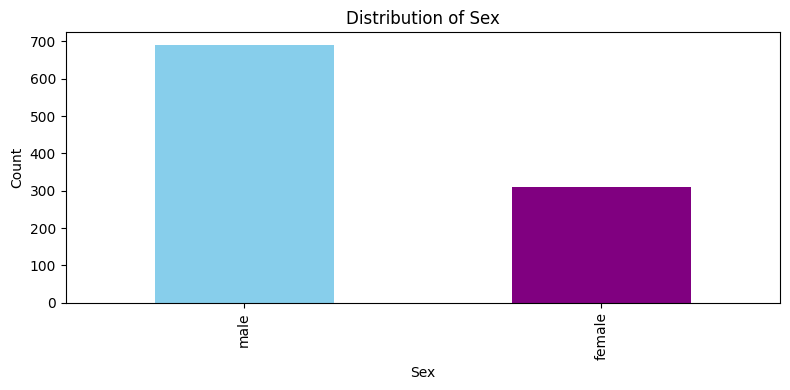

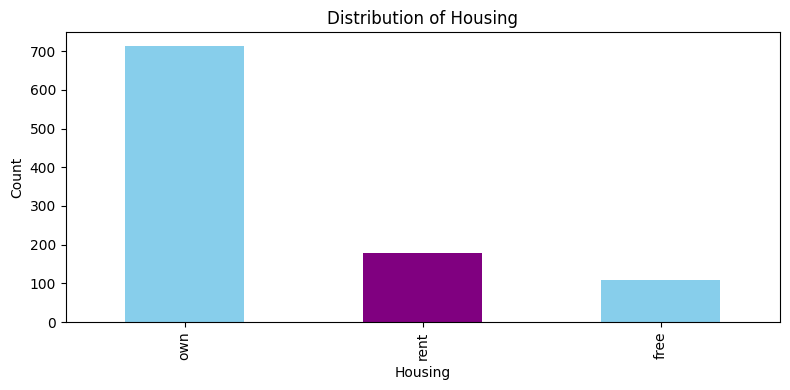

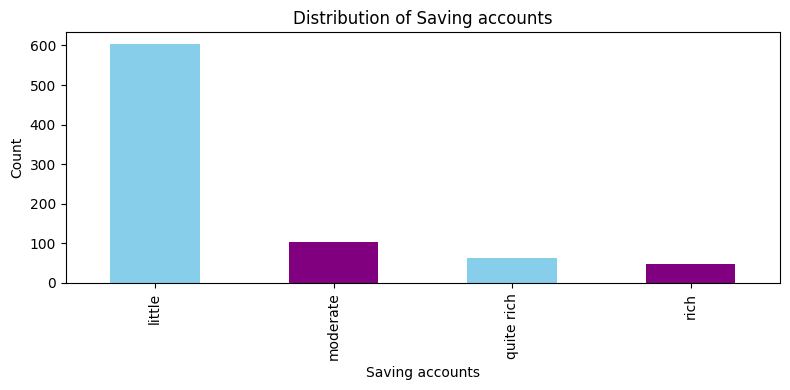

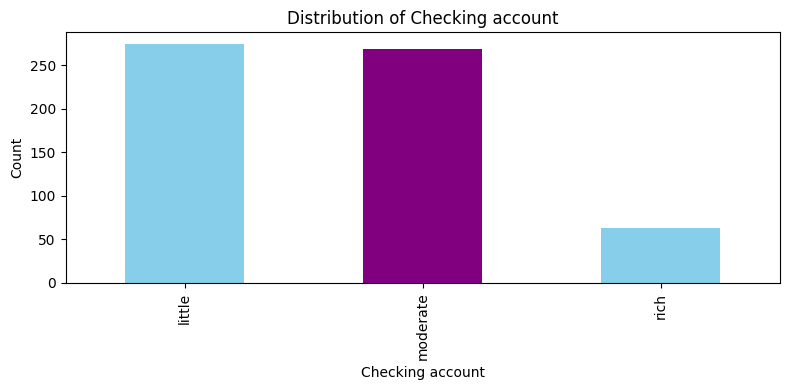

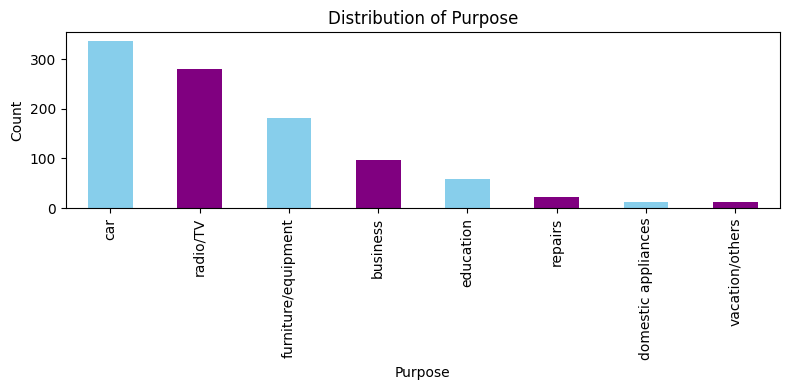

In [75]:
for col in categorical_cols:
    plt.figure(figsize=(8, 4))
    df[col].value_counts().plot(kind='bar' , color=["Skyblue" ,"Purple"])
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.tight_layout()
    plt.show()


###**Bar Chart for specifically the 'Job' attribute**
---

Since the Job attribute is categorical with each number representing a category, it does not make sense to analyze it with the five-number summary or boxplot.Instead a **bar chart** is more suitable to show the frequency of applicants in each job category.

This dataset encodes job status as four categories:
*   **0**=unemployed
*   **1**=unskilled worker
*   **2**=skilled worker
*  **3**=management or highly qualified










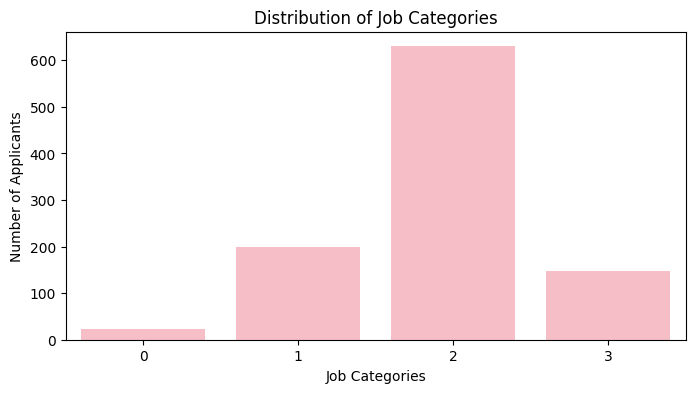

In [76]:
   plt.figure(figsize=(8, 4))
   sns.countplot(x='Job', data=df, color='#FFB6C1')
   plt.title("Distribution of Job Categories")
   plt.xlabel("Job Categories")
   plt.ylabel("Number of Applicants")
   plt.show()


* **0=Unemployed:** Very few applicants fall in this group,showing that most applicants are part of the workforce.
* **1=Unskilled:** A moderate number of applicants are unskilled workers but still much fewer than skilled workers.

* **2=Skilled:** The majority of applicants are skilled workers, making this the dominant group in the dataset
* **3=Management:** A smaller group of applicants are in management or high-level jobs, fewer than both skilled and unskilled workers





**SCATTER PLOT FOR RELATIONSHIPS (CATEGORICAL VS NUMERIC)**

---



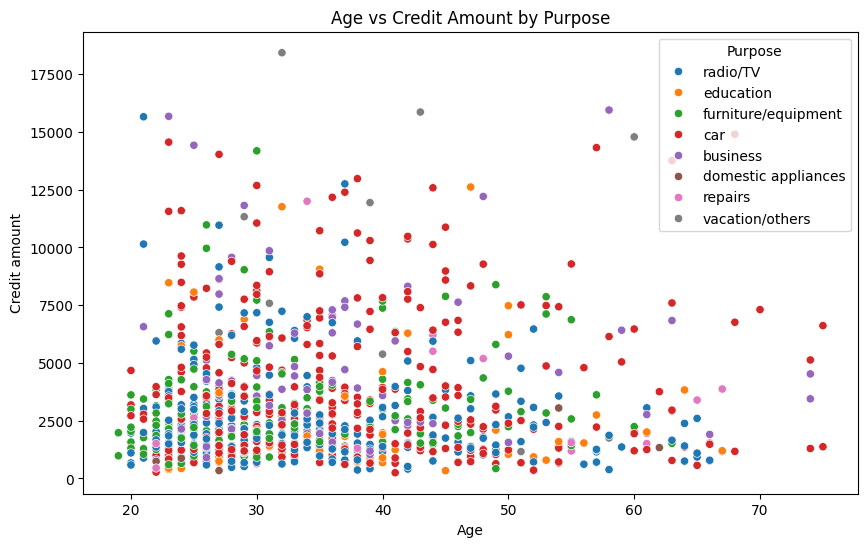

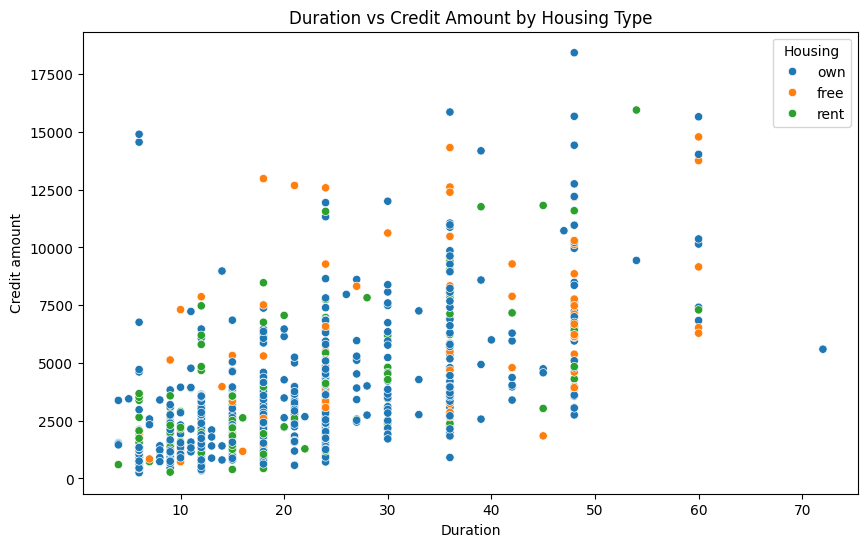

In [77]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Age', y='Credit amount', hue='Purpose')
plt.title('Age vs Credit Amount by Purpose')
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Duration', y='Credit amount', hue='Housing')
plt.title('Duration vs Credit Amount by Housing Type')
plt.show()




### Interpretation of Categorical Distributions

**Sex Distribution:**
- More males than females applied for loans
- This may indicate different borrowing patterns between genders

**Housing Distribution:**
- Most people own their houses
- Home ownership might be a factor in credit approval

**Saving Accounts:**
- Many people have little or moderate savings
- Some applicants have rich savings accounts
- *Contains missing values that need handling*

**Checking Account:**
- Various account balance levels among applicants
- *Contains significant missing values*
- Account balance may affect credit risk assessment

**Purpose Distribution:**
- Car loans are the most common purpose
- Radio/TV and furniture loans are also popular
- Different purposes may have different risk levels

*The scatter plot show that credit amount varies by purpose and age*


## Class Lable Distribution

In [78]:
print("Number of customers in each Risk category:")
risk_counts = df['Risk'].value_counts()
print(risk_counts)

Number of customers in each Risk category:
Risk
good    700
bad     300
Name: count, dtype: int64


**Class Lable Bar chart distribtion**

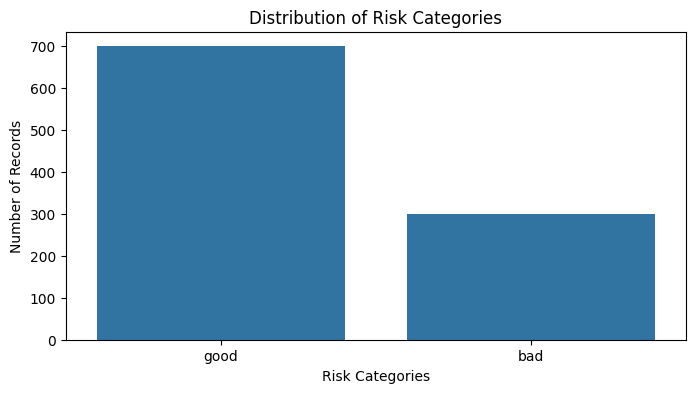

In [79]:
plt.figure(figsize=(8, 4))
sns.countplot(x='Risk', data=df)
plt.title("Distribution of Risk Categories")
plt.xlabel("Risk Categories")
plt.ylabel("Number of Records")
plt.show()

### This is a bar chart for our class lable 'Risk', it showed that we have 2 categories : 'good', 'bad' as well as thier numbers, good:700 , bad: 300 .
### this means that we a have a good balance but not perfect

## **Missing Values:**

### in this code we found out how many missing values we have and in which column (count the missing values)

In [80]:
missing_values = df.isnull().sum()
print("Missing Values:")
print(missing_values)

Missing Values:
Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
Risk                  0
dtype: int64


**We found missing values in saving accounts and checking account but the rest had no missing values**

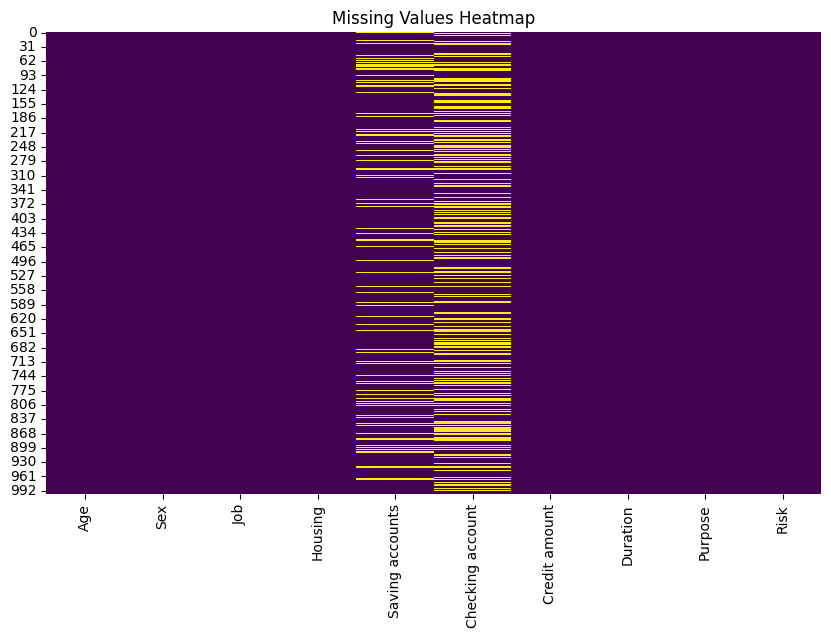

In [81]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cmap='viridis', cbar=False)
plt.title('Missing Values Heatmap')
plt.show()

### **Heat map that visualized the missing values** with thier columns, each yellow line shows a missing value but for purple area it shows the complete data, most of our missing values is in 'Saving accounts and 'Checking account' while the rest do not contain any missing values

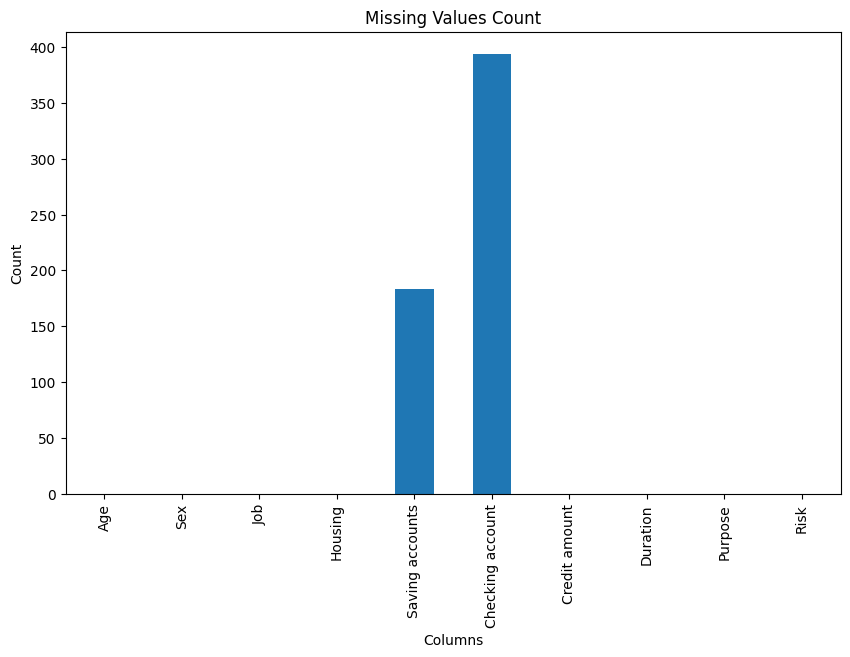

In [82]:
missing_values.plot(kind='bar', figsize=(10, 6))
plt.title('Missing Values Count')
plt.xlabel('Columns')
plt.ylabel('Count')
plt.show()

### **Bar chart that visualized the missing values with thier columns** it has the sane results as the heat map just visualize differently.

## Data Preprocessing

---

we saved a copy of our data before data preprocessing

In [83]:
df_rawdata = df.copy()

In [84]:
df_rawdata.describe(include='all')

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
count,1000.000000,1000,1000.000000,1000,817,606,1000.000000,1000.000000,1000,1000
unique,NaN,2,NaN,3,4,3,NaN,NaN,8,2
top,NaN,male,NaN,own,little,little,NaN,NaN,car,good
freq,NaN,690,NaN,713,603,274,NaN,NaN,337,700
mean,35.546000,NaN,1.904000,NaN,NaN,NaN,3271.258000,20.903000,NaN,NaN
std,11.375469,NaN,0.653614,NaN,NaN,NaN,2822.736876,12.058814,NaN,NaN
min,19.000000,NaN,0.000000,NaN,NaN,NaN,250.000000,4.000000,NaN,NaN
25%,27.000000,NaN,2.000000,NaN,NaN,NaN,1365.500000,12.000000,NaN,NaN
50%,33.000000,NaN,2.000000,NaN,NaN,NaN,2319.500000,18.000000,NaN,NaN
75%,42.000000,NaN,2.000000,NaN,NaN,NaN,3972.250000,24.000000,NaN,NaN


## **Noise removeal**

## **1.1Missing Values Handling:**

* In this step, we focused on detecting and handling missing values in the
dataset.

* Missing data can reduce model performance and cause biased results if not handled properly.

* We first identified which attributes contained missing values.

* Then, we replaced the missing categorical values with the most frequent (mode) value of each column.

* This approach was chosen instead of deleting rows, since removing them would lead to significant data loss.

* Filling with the mode helps preserve the structure and distribution of the dataset.

* It is also the most appropriate method for categorical attributes, where the mean or median are not meaningful.

### Missing Values Detection

In [85]:
# Missing Values Detection
import numpy as np
import pandas as pd
from sklearn.impute import SimpleImputer

df = df.replace(['NA','na','NaN','NULL','None',''], np.nan)

missing_count = df.isnull().sum()
missing_pct = (missing_count / len(df) * 100).round(2)
mv_report = pd.DataFrame({"missing_count": missing_count, "missing_%": missing_pct}).sort_values("missing_count", ascending=False)
display(mv_report)

raw_snapshot = df.head(5).copy()


,missing_count,missing_%
Checking account,394,39.4
Saving accounts,183,18.3
Sex,0,0.0
Age,0,0.0
Housing,0,0.0
Job,0,0.0
Credit amount,0,0.0
Duration,0,0.0
Purpose,0,0.0
Risk,0,0.0



We standardized all placeholder strings (e.g., "NA", "None") into real NaN values to ensure consistent missing data handling.  
Then, we calculated the count and percentage of missing values in each attribute.  
This helps identify which features require imputation in the next step.


### Missing Values Imputation

In [86]:
# Missing Values Imputation
from sklearn.impute import SimpleImputer

# Create an imputer that fills missing categorical values with the most frequent value
imputer = SimpleImputer(strategy='most_frequent')

# Apply the imputer to the categorical columns
df[['Saving accounts', 'Checking account']] = imputer.fit_transform(df[['Saving accounts', 'Checking account']])

# Verify there are no missing values left
display(df[['Saving accounts', 'Checking account']].isnull().sum())


,0
Saving accounts,0
Checking account,0




We handled missing categorical values in the dataset by replacing them with the most frequent value (mode) of each column.
This method preserves the distribution of the data and avoids removing valuable records.
After imputation, both Saving accounts and Checking account columns contained no missing values.

# Missing Values Snapshot

In [87]:
# Missing Values Snapshot

# Store first 5 rows after imputation
after_impute_snapshot = df.head(5).copy()

print("RAW snapshot (first 5 rows):")
display(raw_snapshot)

print("AFTER Missing-Value Handling snapshot (first 5 rows):")
display(after_impute_snapshot)


RAW snapshot (first 5 rows):


,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,NaN,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad


AFTER Missing-Value Handling snapshot (first 5 rows):


,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,little,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,little,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad


 Before and After Snapshot

The first five rows of the dataset are shown below before and after handling missing values.  
This comparison demonstrates that all missing entries in *Saving accounts* and *Checking account* were successfully replaced using the most frequent value strategy.



## **1.2Outliers Handling:**
in our case of data it is not safe to assume that all the outliers are errors because it may carry important information, just like if there is an outlier in the credit amount it may mean that its a high risk loan so we can't just delete them. insted we choese to reduse the range of values so that we could reduse its impact but without losing them completly

In [88]:
for col in numeric_colums:
  Q1 = df[col].quantile(0.25)
  Q3 = df[col].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR
  df[col] = np.where(df[col] < lower_bound, lower_bound, df[col])
  df[col] = np.where(df[col] > upper_bound, upper_bound, df[col])



In [89]:
   print ("handled outliers by bounding them aka IQR capping")
   display(df[numeric_colums].describe())

handled outliers by bounding them aka IQR capping


,Age,Credit amount,Duration
count,1000.000000,1000.000000,1000.000000
mean,35.453500,3051.101000,20.307000
std,11.106324,2187.140403,10.615151
min,19.000000,250.000000,4.000000
25%,27.000000,1365.500000,12.000000
50%,33.000000,2319.500000,18.000000
75%,42.000000,3972.250000,24.000000
max,64.500000,7882.375000,42.000000


### so we redued the extream values to the nearest acceptable boundery uesing IQR so we kept all data points but limited them and thier influence

## **Encoding:**
we will need to encode the categorial columns into numerical inputs so algorithms can process it (e.g., scikit-learn ).



*   we'll use oneshot encoding for Sex, Housing, Purpose.

    **Reason:** oneshot encoding here is better because it prevents the model from

    assuming a false order (e.g., male>female).

*   we'll use label encoding Saving accounts, Checking account.

    **Reason:** label encoding here is better since the attributes have a natural order.









**Oneshot Encoding:**

In [90]:
# Encode Sex, Housing, Purpose
df = pd.get_dummies(df, columns=['Sex', 'Housing', 'Purpose'], dtype=int)
print(df.head())


    Age  Job Saving accounts Checking account  Credit amount  Duration  Risk  \
0  64.5    2          little           little         1169.0       6.0  good   
1  22.0    2          little         moderate         5951.0      42.0   bad   
2  49.0    1          little           little         2096.0      12.0  good   
3  45.0    2          little           little         7882.0      42.0  good   
4  53.0    2          little           little         4870.0      24.0   bad   

   Sex_female  Sex_male  Housing_free  Housing_own  Housing_rent  \
0           0         1             0            1             0   
1           1         0             0            1             0   
2           0         1             0            1             0   
3           0         1             1            0             0   
4           0         1             1            0             0   

   Purpose_business  Purpose_car  Purpose_domestic appliances  \
0                 0            0             

as shown above for columns Sex, Housing, Purpose each attribute variable became a separate binary column

**Label Encoding:**

In [91]:
le = LabelEncoder()
# Encode Saving accounts
df['Saving accounts'] = le.fit_transform(df['Saving accounts'].astype(str))

# Encode Checking account
df['Checking account'] = le.fit_transform(df['Checking account'].astype(str))



print(df.head())

    Age  Job  Saving accounts  Checking account  Credit amount  Duration  \
0  64.5    2                0                 0         1169.0       6.0   
1  22.0    2                0                 1         5951.0      42.0   
2  49.0    1                0                 0         2096.0      12.0   
3  45.0    2                0                 0         7882.0      42.0   
4  53.0    2                0                 0         4870.0      24.0   

   Risk  Sex_female  Sex_male  Housing_free  Housing_own  Housing_rent  \
0  good           0         1             0            1             0   
1   bad           1         0             0            1             0   
2  good           0         1             0            1             0   
3  good           0         1             1            0             0   
4   bad           0         1             1            0             0   

   Purpose_business  Purpose_car  Purpose_domestic appliances  \
0                 0            0 

as shown above we encoded columns Saving accounts, Checking account making them numerical values

## **Normalization:**

We will normalize (Min-Max Scaling) the columns Age, Credit amount, and Duration because they are continuous numerical attributes with very different ranges (e.g., credit amount can reach tens of thousands while age is under 100) this will ensures all features contribute equally.

In [92]:
columns_to_normalize = ['Age', 'Credit amount', 'Duration']

# Apply Min-Max scaling
scaler = MinMaxScaler()
df[columns_to_normalize] = scaler.fit_transform(df[columns_to_normalize])

print("After Min-Max Normalization:")
print(df.head())

After Min-Max Normalization:
        Age  Job  Saving accounts  Checking account  Credit amount  Duration  \
0  1.000000    2                0                 0       0.120408  0.052632   
1  0.065934    2                0                 1       0.746950  1.000000   
2  0.659341    1                0                 0       0.241864  0.210526   
3  0.571429    2                0                 0       0.999951  1.000000   
4  0.747253    2                0                 0       0.605316  0.526316   

   Risk  Sex_female  Sex_male  Housing_free  Housing_own  Housing_rent  \
0  good           0         1             0            1             0   
1   bad           1         0             0            1             0   
2  good           0         1             0            1             0   
3  good           0         1             1            0             0   
4   bad           0         1             1            0             0   

   Purpose_business  Purpose_car  Purpose_dom

as shown above columns Age, Credit amount, and Duration were normalized using Min-Max Scaling causing them to be in range (0,1)

In [93]:
df_rawdata=df_rawdata.copy()
df_rawdata.to_csv("Raw_data.csv", index=False)
print("Snapshot of the raw dataset")
display(df_rawdata.head())

Snapshot of the raw dataset


,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,NaN,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad


In [94]:
df_Preprocessed=df.copy()
df_Preprocessed.to_csv("Preprocessed_data.csv", index=False)
print("Snapshot of the preprocessed dataset")
display(df.head())

Snapshot of the preprocessed dataset


,Age,Job,Saving accounts,Checking account,Credit amount,Duration,Risk,Sex_female,Sex_male,Housing_free,Housing_own,Housing_rent,Purpose_business,Purpose_car,Purpose_domestic appliances,Purpose_education,Purpose_furniture/equipment,Purpose_radio/TV,Purpose_repairs,Purpose_vacation/others
0,1.000000,2,0,0,0.120408,0.052632,good,0,1,0,1,0,0,0,0,0,0,1,0,0
1,0.065934,2,0,1,0.746950,1.000000,bad,1,0,0,1,0,0,0,0,0,0,1,0,0
2,0.659341,1,0,0,0.241864,0.210526,good,0,1,0,1,0,0,0,0,1,0,0,0,0
3,0.571429,2,0,0,0.999951,1.000000,good,0,1,1,0,0,0,0,0,0,1,0,0,0
4,0.747253,2,0,0,0.605316,0.526316,bad,0,1,1,0,0,0,1,0,0,0,0,0,0


df_raw mean our orignal data without any preprocessing
df_Preprocessed means our data after cleaning- encoding- normalizion